In [3]:
#Import the libraries needed:
import pandas as pd
import numpy as np

In [ ]:
'''
1) I need to review the given data to make it analysis-ready, ensuring it can address the needs of the project,
facilitate visualizations, and support future hypothesis testing and statistical methods. 

2) To this end, I will explore and comprehend the provided dataset by constructing a Python dataframe to
conduct an initial dataset examination. 

3) The full understanding of variables will then allow us to design further steps accordingly. 
'''

In [4]:
#Import the dataset:

df = pd.read_csv('Yellow_Taxi_Trip_Data.csv')

In [5]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [6]:
# There are 3 non-numeric data types and no null values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [7]:
''' 
1) A negative min value for fare_amount gets the attention. Are there any other values like this in this column?
If there are, they are going to skew the results for sure for no reason (It is safe to assume that in real life
no taxi fare is a minus value.) We also see from the below that 75% of fares are below 14.50.

2) Max fare_amount of 999.99 and max total_amount of 1200.29 should also be dealt with, as they could potentially skew the results 
and undermine the model's capabilities.

3) Percentiles for trip_distance also reveal that majority of rides range from 1 to 3 miles, whilst there is a max
distance of 33.96. We better analyse this further.

''' 
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [9]:
# Sorting the trip_distance from max to min to spot any unusual values
'''
1) The longest 15 trips range between 33.96 and 26.54 miles, which turns out not unusual after this further exploration.
'''

df_sort = df.sort_values(by=['trip_distance'], ascending=False)
df_sort.head(15)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
10291,76319330,2,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,1,31.95,4,N,138,265,2,131.00,0.0,0.5,0.00,0.00,0.3,131.80
29,94052446,2,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,1,30.83,1,N,132,23,1,80.00,0.5,0.5,18.56,11.52,0.3,111.38
18130,90375786,1,10/26/2017 2:45:01 PM,10/26/2017 4:12:49 PM,1,30.50,1,N,132,220,1,90.50,0.0,0.5,19.85,8.16,0.3,119.31
5792,68023798,2,08/11/2017 2:14:01 PM,08/11/2017 3:17:31 PM,1,30.33,2,N,132,158,1,52.00,0.0,0.5,14.64,5.76,0.3,73.20
15350,77309977,2,09/14/2017 1:44:44 PM,09/14/2017 2:34:29 PM,1,28.23,2,N,13,132,1,52.00,0.0,0.5,4.40,5.76,0.3,62.96
10302,43431843,1,05/15/2017 8:11:34 AM,05/15/2017 9:03:16 AM,1,28.20,2,N,90,132,1,52.00,0.0,0.5,11.71,5.76,0.3,70.27
2592,51094874,2,06/16/2017 6:51:20 PM,06/16/2017 7:41:42 PM,1,27.97,2,N,261,132,2,52.00,4.5,0.5,0.00,5.76,0.3,63.06


In [15]:
# Sorting the total_amount from max to min to spot any unusual values
''' 
1) The top two values are found to be considerably higher than the rest of the column values.
2) Checking these two outputs comparatively, we also see that the trips with the highest fare amount are not necessarily the
longest trips.
'''


df_sort_by_total_amount = df.sort_values(by=['total_amount'], ascending= False)
df_sort_by_total_amount.head(15)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
8476,11157412,1,02/06/2017 5:50:10 AM,02/06/2017 5:51:08 AM,1,2.60,5,N,226,226,1,999.99,0.0,0.0,200.00,0.00,0.3,1200.29
20312,107558404,2,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,2,0.00,5,N,265,265,2,450.00,0.0,0.0,0.00,0.00,0.3,450.30
13861,40523668,2,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,1,33.92,5,N,229,265,1,200.01,0.0,0.5,51.64,5.76,0.3,258.21
12511,107108848,2,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,1,0.00,5,N,265,265,1,175.00,0.0,0.0,46.69,11.75,0.3,233.74
15474,55538852,2,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,1,0.00,5,N,265,265,1,200.00,0.0,0.5,11.00,0.00,0.3,211.80
6064,49894023,2,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,1,32.72,3,N,138,1,1,107.00,0.0,0.0,55.50,16.26,0.3,179.06
16379,101198443,2,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,1,25.50,5,N,132,265,2,140.00,0.0,0.5,0.00,16.26,0.3,157.06
3582,111653084,1,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,1,7.30,5,N,1,1,1,152.00,0.0,0.0,0.00,0.00,0.3,152.30
11269,51920669,1,06/19/2017 12:51:17 AM,06/19/2017 12:52:12 AM,2,0.00,5,N,265,265,1,120.00,0.0,0.0,20.00,11.52,0.3,151.82
9280,51810714,2,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,2,33.96,5,N,132,265,2,150.00,0.0,0.0,0.00,0.00,0.3,150.30


In [16]:
# In line with our previous observation, we see a total of 14 negative values in total_amount column.
df_sort_by_total_amount.tail(15)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
22566,19022898,2,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,1,0.00,1,N,264,193,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1646,57337183,2,07/05/2017 11:02:23 AM,07/05/2017 11:03:00 AM,1,0.04,1,N,79,79,3,-2.5,0.0,-0.5,0.0,0.0,-0.3,-3.3
18565,43859760,2,05/22/2017 3:51:20 PM,05/22/2017 3:52:22 PM,1,0.10,1,N,230,163,3,-3.0,0.0,-0.5,0.0,0.0,-0.3,-3.8
314,105454287,2,12/13/2017 2:02:39 AM,12/13/2017 2:03:08 AM,6,0.12,1,N,161,161,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8
5758,833948,2,01/03/2017 8:15:23 PM,01/03/2017 8:15:39 PM,1,0.02,1,N,170,170,3,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8
5448,28459983,2,04/06/2017 12:50:26 PM,04/06/2017 12:52:39 PM,1,0.25,1,N,90,68,3,-3.5,0.0,-0.5,0.0,0.0,-0.3,-4.3
4423,97329905,2,11/16/2017 8:13:30 PM,11/16/2017 8:14:50 PM,2,0.06,1,N,237,237,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3
10281,55302347,2,06/05/2017 5:34:25 PM,06/05/2017 5:36:29 PM,2,0.00,1,N,238,238,4,-2.5,-1.0,-0.5,0.0,0.0,-0.3,-4.3
8204,91187947,2,10/28/2017 8:39:36 PM,10/28/2017 8:41:59 PM,1,0.41,1,N,236,237,3,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8
20317,75926915,2,09/09/2017 10:59:51 PM,09/09/2017 11:02:06 PM,1,0.24,1,N,116,116,4,-3.5,-0.5,-0.5,0.0,0.0,-0.3,-4.8


In [17]:
# Distribution of payment types: (1=Credit Card, 2=Cash)
df['payment_type'].value_counts() 

payment_type
1    15265
2     7267
3      121
4       46
Name: count, dtype: int64

In [20]:
#Average tip when the fare is paid with Credit Card
#Average tip when the fare is paid in Cash

avg_cc_tip= df[df['payment_type']==1]['tip_amount'].mean()
avg_cash_tip= df[df['payment_type']==2] ['tip_amount'].mean()

print(avg_cc_tip)
print(avg_cash_tip)

2.7298001965280054
0.0


In [ ]:
#I also want to explore whether there is a difference between the mean payment amounts across different payment methods.

In [135]:
df.groupby('payment_type')['fare_amount'].mean()

payment_type
1    13.429748
2    12.213546
3    12.186116
4     9.913043
Name: fare_amount, dtype: float64

In [140]:

from scipy import stats
credit_card_payment = df[df['payment_type'] == 1]['fare_amount']
cash_payment = df[df['payment_type'] == 2]['fare_amount']
stats.ttest_ind(a=credit_card_payment, b=cash_payment, equal_var=False)

TtestResult(statistic=6.866800855655372, pvalue=6.797387473030518e-12, df=16675.48547403633)

In [ ]:
'''Ttest results reveal a statistically significant difference between the means of payments made with credit card and
those made in cash. T-stat magnitude is high and P-value is nearly zero, so null hypothesis would be rejected at any 
significance level, even at 1%. Based on the alternative hypotheses that we can accept, when more customers pay by credit 
card, revenues could hypothetically increase. But we should note that there could be other potential factors causing this 
difference.''' 


In [21]:
#How do the trips distribute accross two vendors and what is the mean total amount for each?
df['VendorID'].value_counts()

VendorID
2    12626
1    10073
Name: count, dtype: int64

In [27]:
#There is no considerable difference in total amount means across the two vendors.
df.groupby(['VendorID'])['total_amount'].mean()

VendorID
1    16.298119
2    16.320382
Name: total_amount, dtype: float64

In [28]:
credit_card_payments= df[df['payment_type']==1]

credit_card_payments['passenger_count'].value_counts()

passenger_count
1    10977
2     2168
5      775
3      600
6      451
4      267
0       27
Name: count, dtype: int64

In [35]:
#The mean tip across different passenger counts do not show a considerable discrepancy.
credit_card_payments.groupby(['passenger_count'])['tip_amount'].mean()

passenger_count
0    2.610370
1    2.714681
2    2.829949
3    2.726800
4    2.607753
5    2.762645
6    2.643326
Name: tip_amount, dtype: float64

In [ ]:
'''
Upon examining the dataset, it becomes evident that "total_amount" and "trip_distance" variables
are the most promising variables for constructing a predictive model for taxi ride fares. 
'''

In [38]:
'''Further Exploratory Data Analysis will now be conducted to have a deeper understanding about
the variables and clean data where required. Outliers will be addressed as discussed earlier. 
Some data will also be visualised'''

#Import the libraries needed
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns 

In [39]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


In [41]:
#Following will help us work with date column, by converting the time values into 24-hour format and date format into yyyy-mm-dd.
 
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [43]:
df.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55


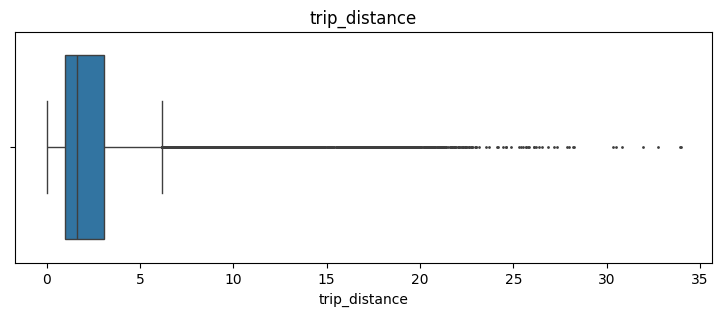

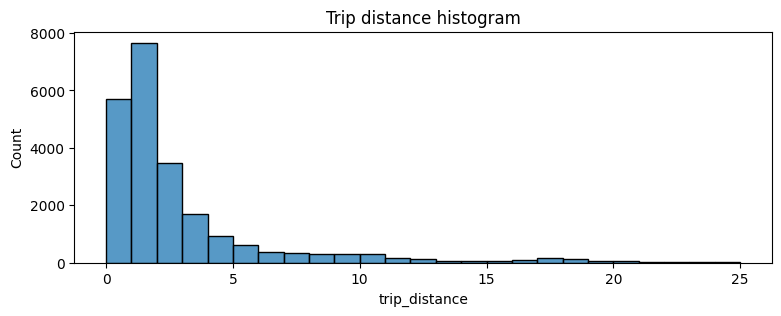

In [48]:
# Now creating boxplots and histograms to observe outliers
plt.figure(figsize=(9,3)) 
plt.title('trip_distance')
sns.boxplot(data=None, x=df['trip_distance'], fliersize=1)

plt.figure(figsize=(9,3))
sns.histplot(df['trip_distance'], bins=range(0,26,1))
plt.title('Trip distance histogram');

In [ ]:
# Most taxi trips were for less than 2 miles, beyond which the count of trips fell dramatically.

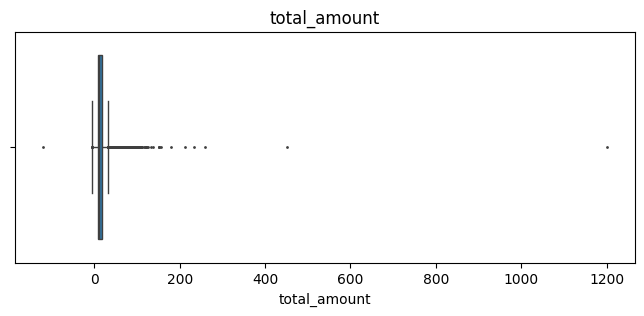

In [49]:

plt.figure(figsize=(8,3))
plt.title('total_amount')
sns.boxplot(x=df['total_amount'], fliersize=1);

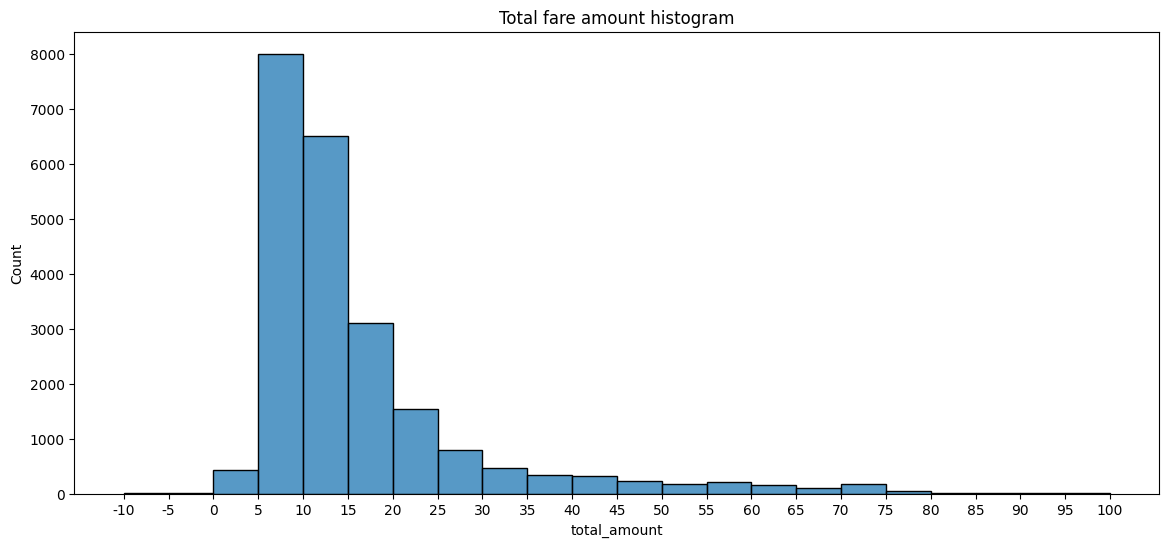

In [50]:

plt.figure(figsize=(14,6))
ax = sns.histplot(df['total_amount'], bins=range(-10,101,5))
ax.set_xticks(range(-10,101,5))
ax.set_xticklabels(range(-10,101,5))
plt.title('Total fare amount histogram');

In [51]:
#Just like distance data, total fare amount is also right-skewed, with total amount of most taxi trips ranging from 5 to 15.


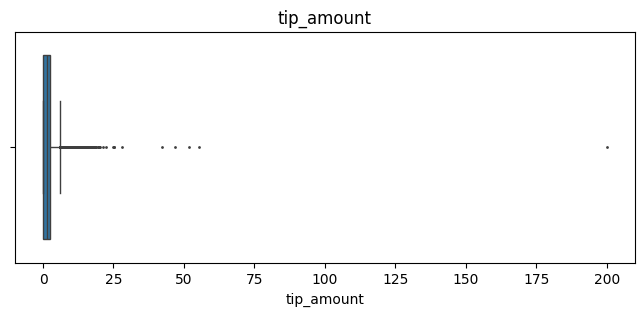

In [53]:
plt.figure(figsize=(8,3))
plt.title('tip_amount')
sns.boxplot(x=df['tip_amount'], fliersize=1);

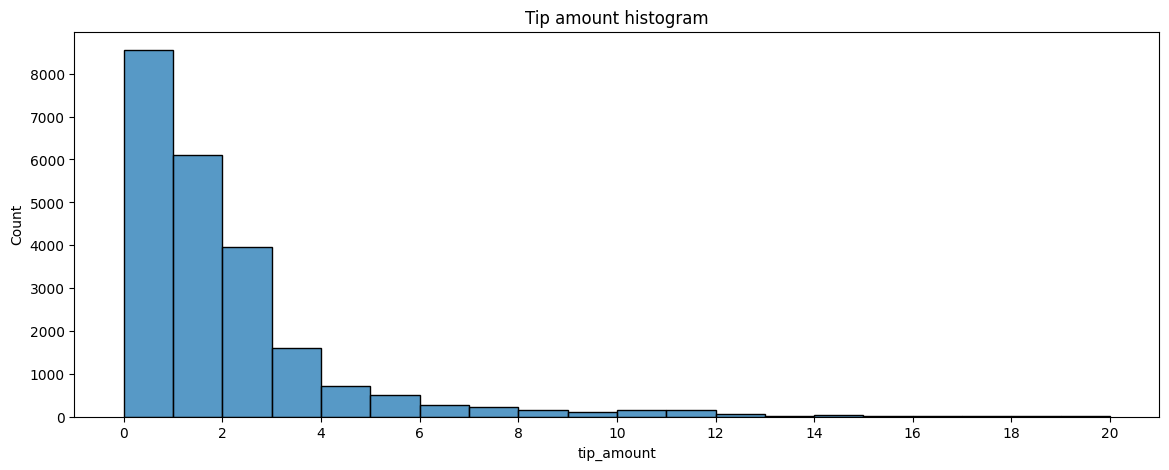

In [54]:
plt.figure(figsize=(14,5))
ax = sns.histplot(df['tip_amount'], bins=range(0,21,1))
ax.set_xticks(range(0,21,2))
ax.set_xticklabels(range(0,21,2))
plt.title('Tip amount histogram');

In [ ]:
#Most tips fall in the range of 0-3, skewing the distribution of tip amounts to the right.

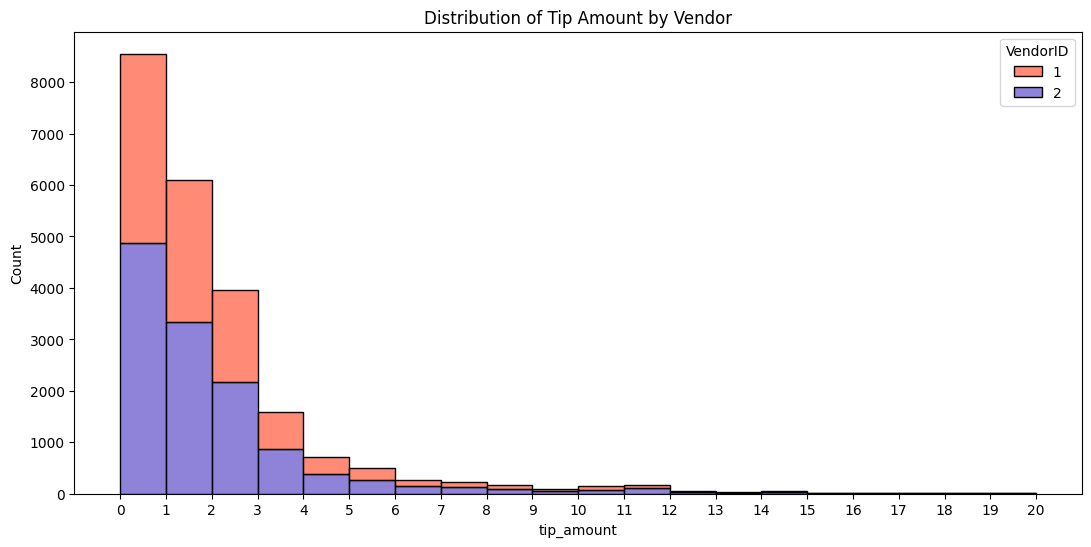

In [57]:
# In line with previous observations, an overview of how tip amount distributes across two vendors:
plt.figure(figsize=(13, 6))
ax = sns.histplot(data=df, x='tip_amount', bins=range(0, 21, 1),
                  hue='VendorID',
                  multiple='stack',
                  palette=['tomato', 'slateblue'])  
ax.set_xticks(range(0, 21, 1))
ax.set_xticklabels(range(0, 21, 1))
plt.title('Distribution of Tip Amount by Vendor');


In [ ]:
'''Dissecting the tip amounts according to two vendors uncovers a relatively uniform distribution of tips, with
Vendor 2 handling a slightly higher percentage of the rides across various tip amounts.
As the above histogram is not viewer-friendly beyond $10, we run the following.'''

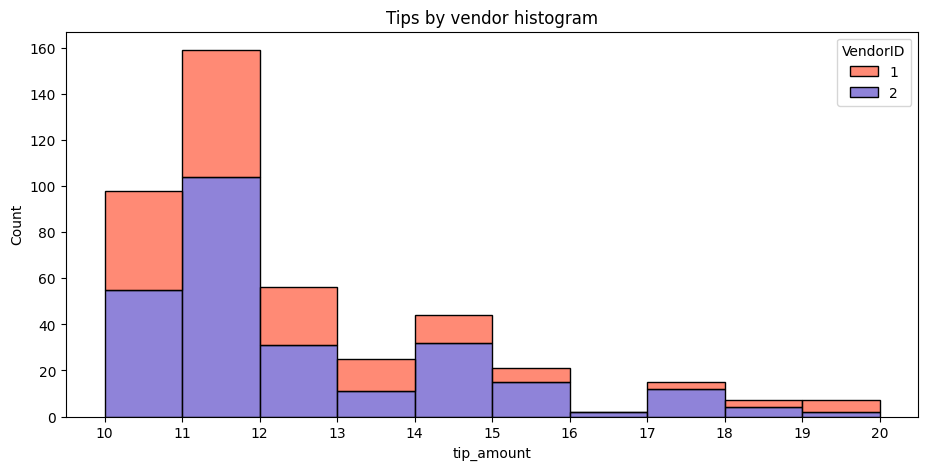

In [64]:
tip_amounts_over_ten = df[df['tip_amount'] > 10]
plt.figure(figsize=(11,5))
ax = sns.histplot(data=tip_amounts_over_ten, x='tip_amount', bins=range(10,21,1), 
                  hue='VendorID', 
                  multiple='stack',
                  palette=['tomato','slateblue'])
ax.set_xticks(range(10,21,1))
ax.set_xticklabels(range(10,21,1))
plt.title('Tips by vendor histogram');

In [ ]:
#The trend mostly prevails above £10, too.  $19-20 range is an exception, which turns out insignificant, due to its 
#small sample size.

In [65]:
df['passenger_count'].value_counts()

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

In [ ]:
# Majority of rides were single occupancy. 33 of the rides were by zero number of passengers, which is not meaningful.
# Unless reasonably explained, those rows would be dropped. 

In [79]:

mean_tips_by_passenger_count = df.groupby('passenger_count')['tip_amount'].mean().reset_index()
print(mean_tips_by_passenger_count)


   passenger_count  tip_amount
0                0    2.135758
1                1    1.848920
2                2    1.856378
3                3    1.716768
4                4    1.530264
5                5    1.873185
6                6    1.720260


/var/folders/hp/5g38_43519bfmfp3l0c4rc9m0000gn/T/ipykernel_54712/2566673325.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=data.index,
/var/folders/hp/5g38_43519bfmfp3l0c4rc9m0000gn/T/ipykernel_54712/2566673325.py:7: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.barplot(x=data.index,


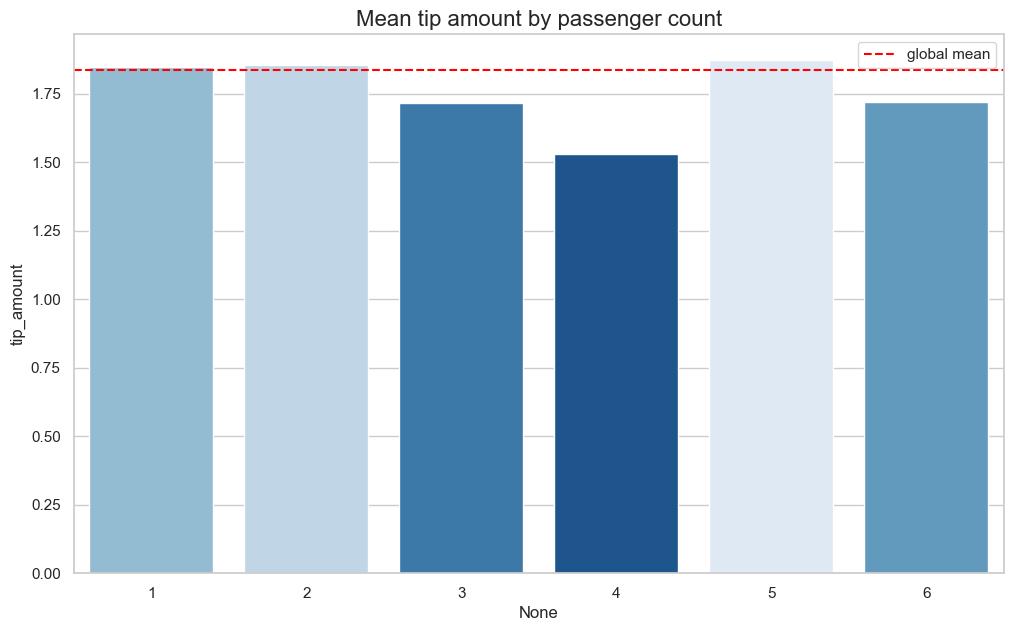

In [119]:
# Create bar plot for mean tips by passenger count
data = mean_tips_by_passenger_count.tail(-1)
pal = sns.color_palette("Blues", len(data))
sns.set(style="whitegrid")
rank = data['tip_amount'].argsort().argsort()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=data.index,
            y=data['tip_amount'],
            palette=np.array(pal[::-1])[rank])
ax.axhline(df['tip_amount'].mean(), ls='--', color='red', label='global mean')
ax.legend()
plt.title('Mean tip amount by passenger count', fontsize=16);

In [ ]:
# Mean tips show a fall in rides with 4 passengers. However, we know that the rides with 4 passengers are very 
# low in number.

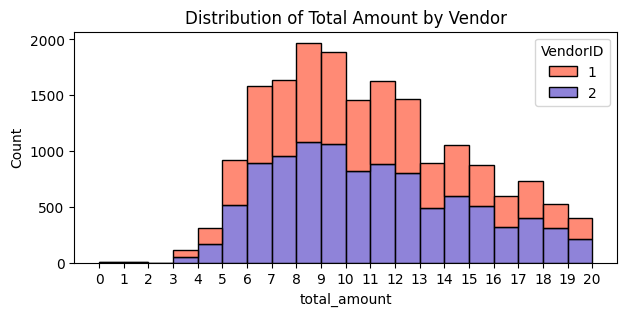

In [86]:
# How total amount is distributed accross two vendors is also worth investigation:
plt.figure(figsize=(7, 3))
ax = sns.histplot(data=df, x='total_amount', bins=range(0, 21, 1),
                  hue='VendorID',
                  multiple='stack',
                  palette=['tomato', 'slateblue'])  
ax.set_xticks(range(0, 21, 1))
ax.set_xticklabels(range(0, 21, 1))
plt.title('Distribution of Total Amount by Vendor');


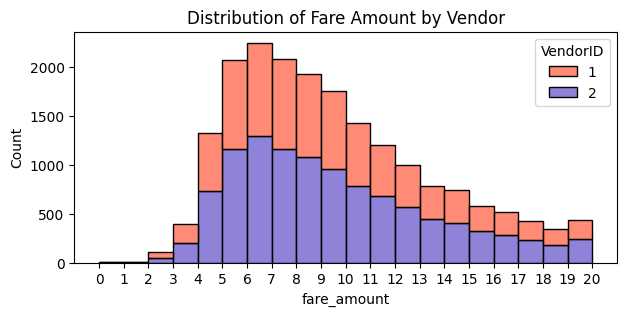

In [87]:
# How total amount is distributed accross two vendors is also worth investigation:
plt.figure(figsize=(7, 3))
ax = sns.histplot(data=df, x='fare_amount', bins=range(0, 21, 1),
                  hue='VendorID',
                  multiple='stack',
                  palette=['tomato', 'slateblue'])  
ax.set_xticks(range(0, 21, 1))
ax.set_xticklabels(range(0, 21, 1))
plt.title('Distribution of Fare Amount by Vendor');


In [88]:
'''Similar distribution is maintained across two vendors for fare_amount and total_amount, with a noticeable difference
being a more right-skewed fare_amount data, which is because total_amount values includes tips so has more data
points in the ranges of 5-7 and 10-19'''


'Similar distribution is maintained across two vendors for fare_amount and total_amount, with a noticeable difference\nbeing a more right-skewed fare_amount data, which is because total_amount values includes tips so has more data\npoints in the ranges of 5-7 and 10-19'

In [89]:
df['month'] = df['tpep_pickup_datetime'].dt.month_name()
df['day'] = df['tpep_dropoff_datetime'].dt.day_name()


In [90]:
# To see if there is an available insight from the distribution of trips over months:
monthly_rides = df['month'].value_counts()
monthly_rides

month
March        2049
October      2027
April        2019
May          2013
January      1997
June         1964
December     1863
November     1843
February     1769
September    1734
August       1724
July         1697
Name: count, dtype: int64

In [91]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_rides = monthly_rides.reindex(index=month_order)
monthly_rides

month
January      1997
February     1769
March        2049
April        2019
May          2013
June         1964
July         1697
August       1724
September    1734
October      2027
November     1843
December     1863
Name: count, dtype: int64

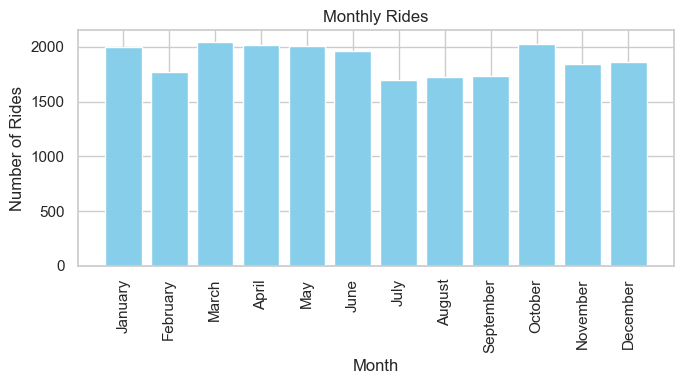

In [118]:
plt.figure(figsize=(7, 4))
sns.set(style="whitegrid")
plt.bar(monthly_rides.index, monthly_rides.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Monthly Rides')
plt.xticks(rotation=90)  # I want the x-axis labels rotated for better readability
plt.tight_layout()  # I wanted to ensure suitable spacing.
plt.show()


In [95]:
#Summer months witness a fall in the number of rides, as well as February. Other than these, the figures are consistent.


In [96]:
daily_rides = df['day'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_rides = daily_rides.reindex(index=day_order)
daily_rides

day
Monday       2940
Tuesday      3192
Wednesday    3380
Thursday     3392
Friday       3417
Saturday     3352
Sunday       3026
Name: count, dtype: int64

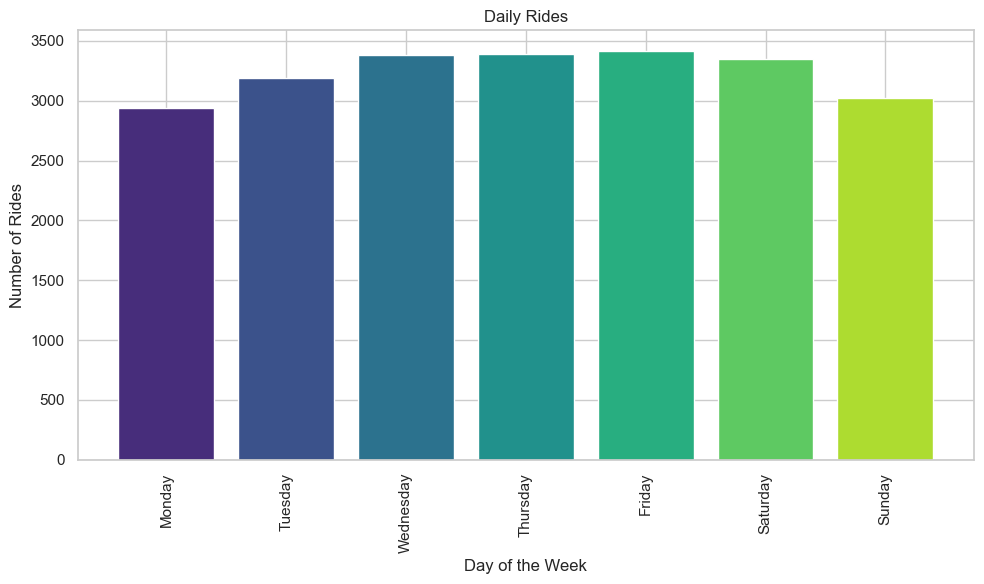

In [117]:
#Our datetime conversion also allows scrutiny by day, where no big gaps between days are observed:


colors = sns.color_palette("viridis", len(daily_rides))

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plt.bar(daily_rides.index, daily_rides.values, color=colors)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.title('Daily Rides')
plt.xticks(rotation=90)  # For better readability
plt.tight_layout()  # Adjusted spacing
plt.show()


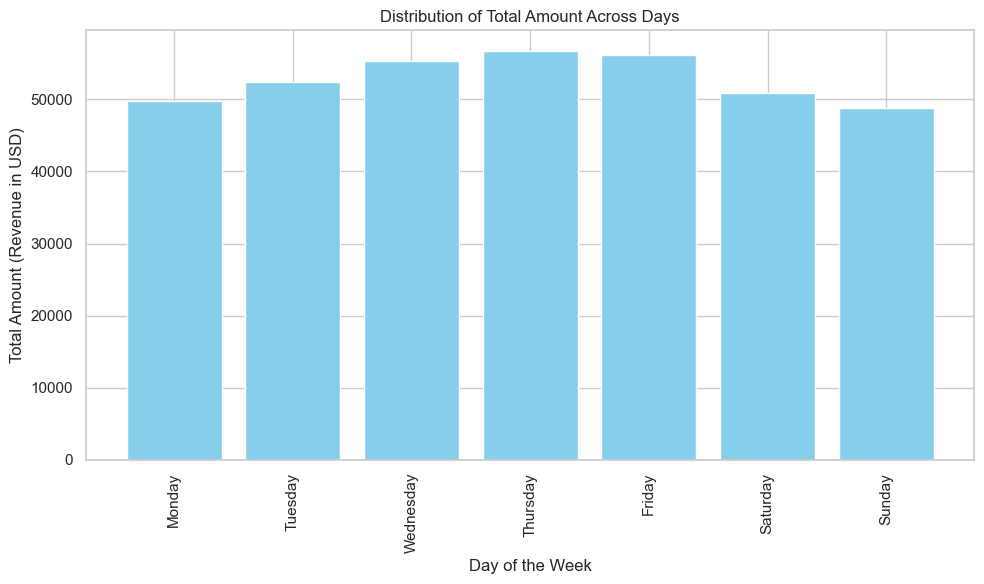

In [116]:
#Monday and Sunday though turn out as the days with lowest number of taxi rides across the year. To see how this is
# reflected in total revenue by day: 

daily_total_amount = df.groupby('day')['total_amount'].sum()
daily_total_amount = daily_total_amount.reindex(index=day_order)

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plt.bar(daily_total_amount.index, daily_total_amount.values, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Total Amount (Revenue in USD)')
plt.title('Distribution of Total Amount Across Days')
plt.xticks(rotation=90)  
plt.tight_layout() 
plt.show()

In [ ]:
#Highest revenue is made on Thursday. As a note, although Thursday and Saturday have nearly equal number of rides,
#Thursday is around $6000 ahead. Do Saturday riders tend to tip less, or thursday riders tip more? Or is it the
#distances that cause this gap? Will be analysed further.

In [106]:
mean_tip_by_day = df.groupby(['day'])['tip_amount'].mean()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
mean_tip_by_day = mean_tip_by_day.reindex(index=day_order)
mean_tip_by_day


day
Monday       1.933663
Tuesday      1.871319
Wednesday    1.916568
Thursday     1.893488
Friday       1.856599
Saturday     1.638520
Sunday       1.743275
Name: tip_amount, dtype: float64

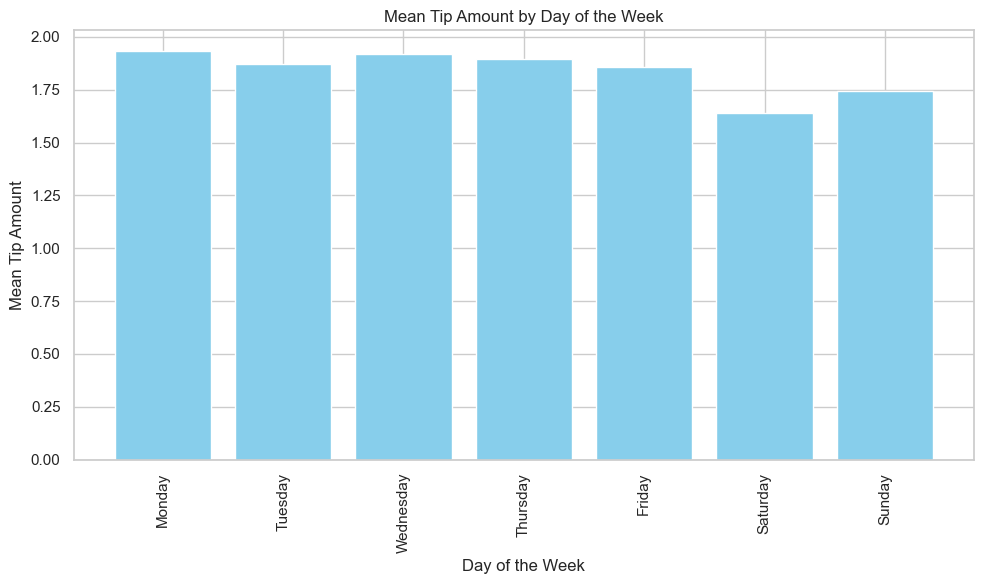

In [115]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plt.bar(mean_tip_by_day.index, mean_tip_by_day.values, color='skyblue')
plt.xlabel('Day of the Week')
plt.ylabel('Mean Tip Amount')
plt.title('Mean Tip Amount by Day of the Week')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()


In [ ]:
#Although Monday has the lowest figures for number of rides and total amount, it is also the day when most tip is generated.
#Thursday comes third in terms of tip, whilst it has the highest revenue.

In [111]:
total_revenue_by_month = df.groupby(['month'])['total_amount'].sum()
total_revenue_by_month = total_revenue_by_month.reindex(index=month_order)
total_revenue_by_month



month
January      31735.25
February     28937.89
March        33085.89
April        32012.54
May          33828.58
June         32920.52
July         26617.64
August       27759.56
September    28206.38
October      33065.83
November     30800.44
December     31261.57
Name: total_amount, dtype: float64

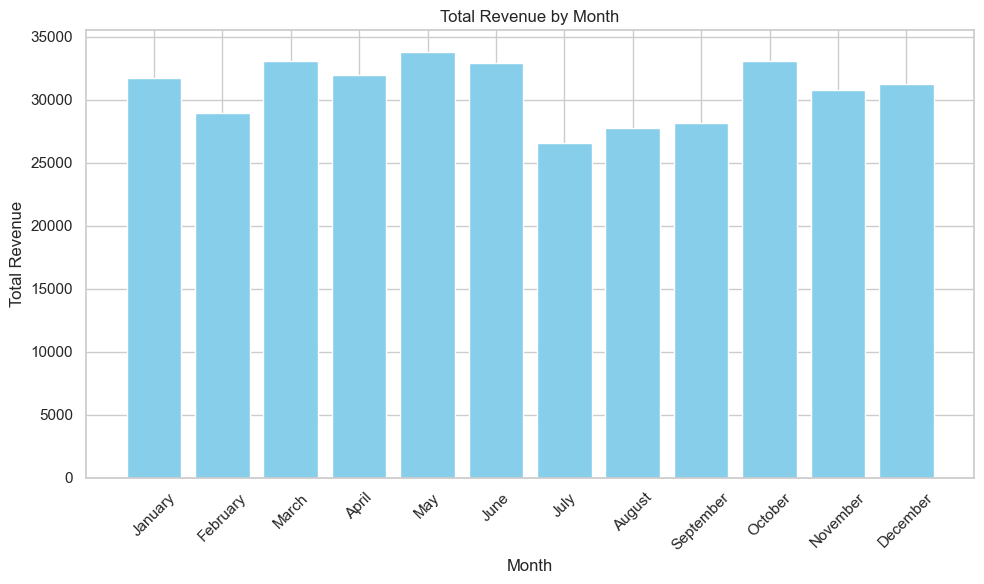

In [114]:
plt.figure(figsize=(10, 6))
colors = sns.color_palette("husl", len(total_revenue_by_month))
sns.set(style="whitegrid")
plt.bar(total_revenue_by_month.index, total_revenue_by_month.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Total Revenue by Month')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [ ]:
#Monthly rides and revenues generally correlate, with falls in July, August and September, as well as in Feb.

In [120]:
distance_by_dropoff_location = df.groupby('DOLocationID')['trip_distance'].mean()

distance_by_dropoff_location = distance_by_dropoff_location.sort_values(ascending=False)
distance_by_dropoff_location

DOLocationID
23     24.275000
29     21.650000
210    20.500000
11     17.945000
51     17.310000
         ...    
137     1.818852
234     1.727806
237     1.555494
193     1.390556
207     1.200000
Name: trip_distance, Length: 216, dtype: float64

In [126]:
distance_by_dropoff_location = df.groupby('DOLocationID')[['trip_distance']].mean()

In [128]:
distance_by_dropoff_location = distance_by_dropoff_location.sort_values(by='trip_distance')
distance_by_dropoff_location

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


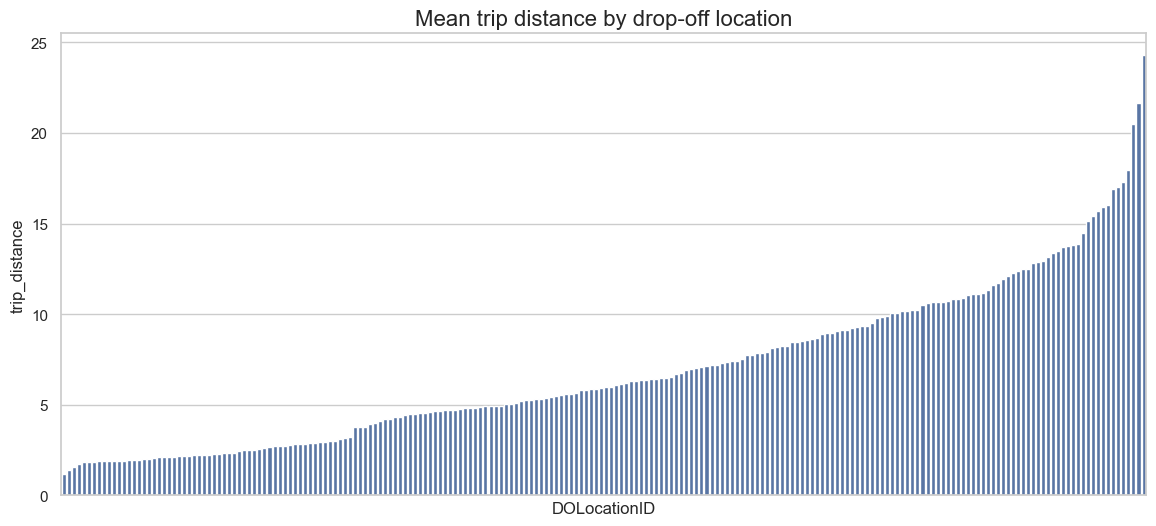

In [131]:
plt.figure(figsize=(14,6))
ax = sns.barplot(x=distance_by_dropoff_location.index, 
                 y=distance_by_dropoff_location['trip_distance'],
                 order=distance_by_dropoff_location.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('Mean trip distance by drop-off location', fontsize=16);

In [ ]:
#This plot resembles a cumulative density function curve, indicating even distribution of drop-off locations. 
#This is valuable given the absence of geographic coordinates for location analysis in the dataset.

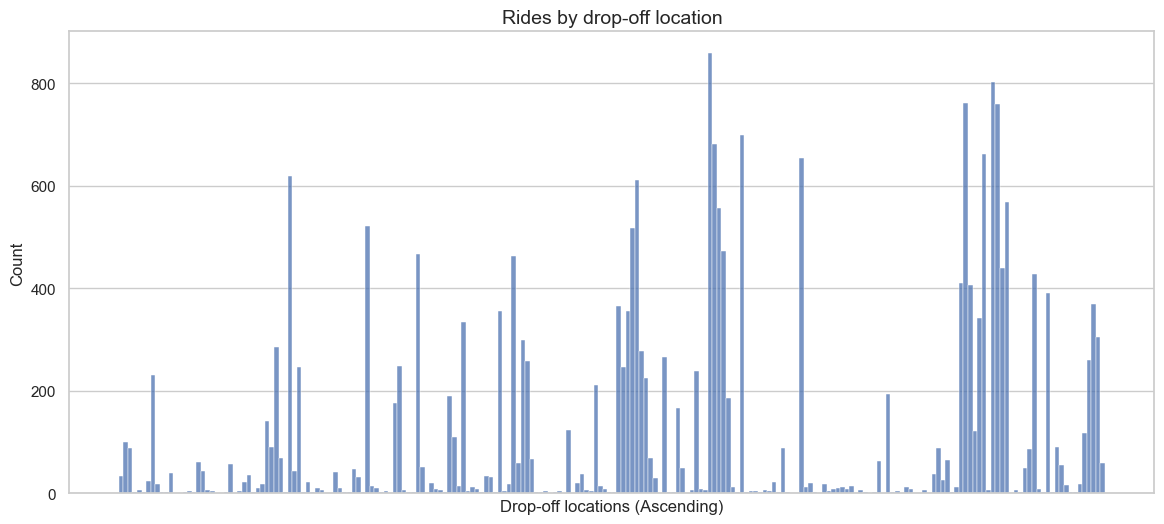

In [134]:
plt.figure(figsize=(14,6))

sorted_dropoffs = df['DOLocationID'].sort_values() #Now sorting in asceding order as drop off locations are numeric.

sorted_dropoffs = sorted_dropoffs.astype('str') #Conversion into string to treat IDs as categorical data as required.

sns.histplot(sorted_dropoffs, bins=range(0, df['DOLocationID'].max()+1, 1))
plt.xticks([])
plt.xlabel('Drop-off locations (Ascending)')
plt.title('Rides by drop-off location', fontsize=14);

In [ ]:
# Further exploration reveals that, out of the 216 dropoff locations, some attract outstandingly high numbers of trips.
# DropoffIDs are not associated with names of the locations, so we do not know where these LocationIDs refer to.  


In [142]:
from datetime import date
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error

In [ ]:
# Things like outliers, missing data or multicollinearity between variables will be checked
# before building a regression model.

In [151]:
df1 = pd.read_csv('Yellow_Taxi_Trip_Data.csv')


In [159]:
#Time to check for any duplicates or missing data:

print('Shape Now', df1.shape)
df1_no_duplicates = df1.drop_duplicates()
print('Shape after dropping duplicates', df1_no_duplicates.shape)

missing_data = df1.isna().sum()  
print(missing_data)


Shape Now (22699, 18)
Shape after dropping duplicates (22699, 18)
Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


In [160]:
#No missing values or duplicates. 

df1.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [ ]:
# Total_amount of $1200, fare amount of $999.99 and tip amount of $200 are some of the outliers that are evident from the summary statistics.
# -$120.30 for total_amount and -$120 for fare amount are clearly some other outliers in the dataset. 

In [161]:
df1['tpep_pickup_datetime']=pd.to_datetime(df1['tpep_pickup_datetime'])
df1['tpep_dropoff_datetime']=pd.to_datetime(df1['tpep_dropoff_datetime'])

In [166]:
df1.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,0 days 00:16:43


In [164]:
df1['trip_duration'] = df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime']

In [167]:
df1.head(5)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,0 days 00:14:04
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,0 days 00:26:30
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,0 days 00:07:12
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,0 days 00:30:15
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,0 days 00:16:43


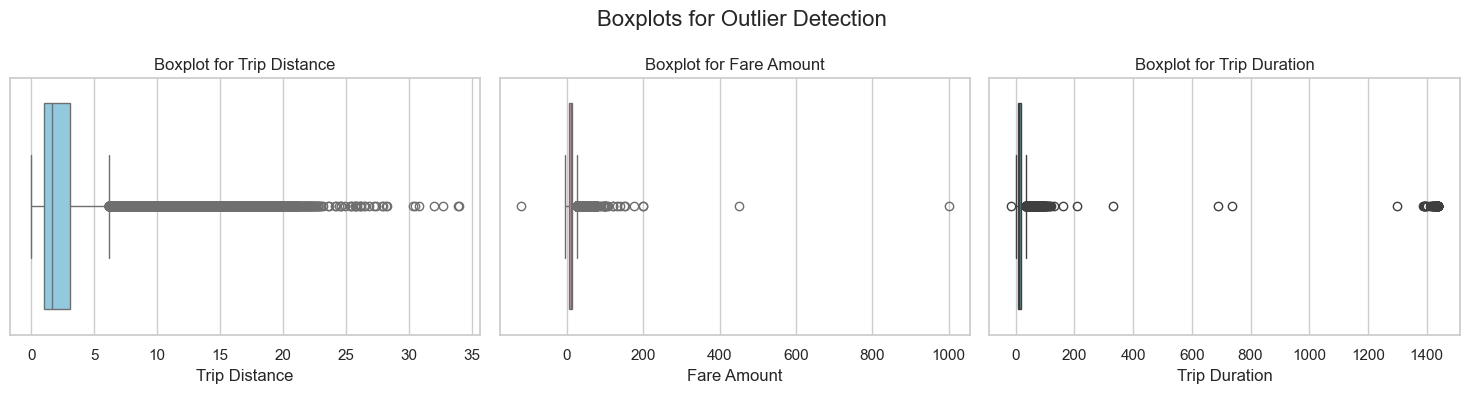

In [178]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
fig.suptitle('Boxplots for Outlier Detection', fontsize=16)
sns.set(style="whitegrid", palette="Set3")

sns.boxplot(ax=axes[0], x=df1['trip_distance'], color='skyblue')
sns.boxplot(ax=axes[1], x=df1['fare_amount'], color='lightcoral')
sns.boxplot(ax=axes[2], x=df1['trip_duration'], color='lightseagreen')

axes[0].set(xlabel='Trip Distance', ylabel=None, title='Boxplot for Trip Distance')
axes[1].set(xlabel='Fare Amount', ylabel=None, title='Boxplot for Fare Amount')
axes[2].set(xlabel='Trip Duration', ylabel=None, title='Boxplot for Trip Duration')

plt.tight_layout()
plt.show()

In [177]:
df1['trip_duration'] = (df1['tpep_dropoff_datetime'] - df1['tpep_pickup_datetime'])/np.timedelta64(1,'m')

In [175]:

df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

In [ ]:
# datetime conversions and duration calculation are repated with some adjustments after encountering errors when 
# producing the trip duration boxplot.
'''There are outliers in all variables, with the most extreme ones being in fare amount and trip duration
The way data points distribute in trip distance does not indicate an unusual outlier issue'''

In [ ]:
#I now need to investigate the zero values in trip distance further. The chances are they are mistakenly input or some
#trips were rounded down when trips were too short. 

In [181]:
sum(df1['trip_distance']==0)
#148 zero values found in trip_distance column. 
#They will be ignored considering their proportion to the total sample size of 22699. It should not have much impact
#and they are not necessarily erroneous as seen below:

148

In [180]:
sorted(set(df1['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

In [ ]:
#Values are recorded with precision. 

In [182]:
df1['trip_duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: trip_duration, dtype: float64

In [204]:
df['fare_amount'].describe()

count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

In [ ]:
#Max fare amount is as high as 999.99, which does not look realistic. With some intuition and for the sake of
#building a reliable model free from unnecessarily/erroneously skewed data, we need to cap extreme high and lows in fare_amount

In [187]:
iqr = 14.5 - 6.5
print('iqr =', iqr)

iqr = 8.0


In [188]:
#The rule advises Q3 + 1.5 * IQR for the upper threshold:

14.5 + 1.5*8

26.5

In [196]:
df['fare_amount'].sort_values(ascending=False).head(10)

8476     999.99
20312    450.00
13861    200.01
15474    200.00
12511    175.00
3582     152.00
9280     150.00
16379    140.00
10291    131.00
11269    120.00
Name: fare_amount, dtype: float64

In [202]:
#Considering the above results, $26.5 does not seem to be an appropriate level to cap the fares at.
#Rather, a higher factor of 6 will be used.

14.5 + 6*8

62.5

In [205]:
def outlier_imputer(column_list, iqr_factor):
 
    for col in column_list:
        # Minimum reassigned to zero (zero is the value for lower threshold, as minus fare amounts are obviously erroneous)
        df.loc[df[col] < 0, col] = 0

        # Upper threshold as previously calculated above
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df.loc[df[col] > upper_threshold, col] = upper_threshold
        print(df[col].describe())
        print()

In [206]:
outlier_imputer(['fare_amount'], 6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



In [212]:
df['duration'].sort_values(ascending= True).head(10)

9356    -16.983333
14062     0.000000
19838     0.000000
17270     0.000000
8889      0.000000
17567     0.000000
22026     0.000000
12501     0.000000
4742      0.000000
21836     0.000000
Name: duration, dtype: float64

In [209]:
df['duration'].sort_values(ascending= False).head(10)

924      1439.550000
15579    1439.150000
14998    1438.850000
22638    1438.650000
15163    1438.550000
7939     1438.466667
21366    1438.266667
6751     1438.033333
6493     1437.833333
18650    1436.966667
Name: duration, dtype: float64

In [213]:
# We impute zero for any values, effectively replacing only one value.
df.loc[df['duration'] < 0, 'duration'] = 0
df['duration'].min() 

0.0

In [214]:
# Using our outlier_imputer function that we defined above, we assign the upperthreshold, making the max 88.78:
outlier_imputer(['duration'], 6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



In [ ]:
# As part of feature engineering, we now need to generate a new column named "mean_distance" to capture the average 
# distance for each set of trips that share the same pickup and dropoff locations.

In [ ]:
''' A supporting column called "pickup_dropoff" that lists the  pickup and dropoff location IDs combined for each row is 
needed. Pickup and dropoff location IDs will therefore be converted into strings and then combined them with a space 
separator in order that a trip with pickup and dropoff points of 12 and 151 is distinguished from a trip with points 
121 and 51.

In [215]:
df['pickup_dropoff'] = df['PULocationID'].astype(str) + ' ' + df['DOLocationID'].astype(str)
df['pickup_dropoff'].head(1)

0    100 231
Name: pickup_dropoff, dtype: object

In [216]:
grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['trip_distance']]
grouped[:10]

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000
100 113,2.024000
100 114,1.940000
100 12,4.550000
100 125,2.840000


In [217]:
#What we need is a dictionary like this: {'1 2': 1.25, '3 4': 2, '4 5': 3}

grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['trip_distance']

In [218]:
df['mean_distance'] = df['pickup_dropoff']

In [219]:
df['mean_distance'] = df['mean_distance'].map(grouped_dict)

In [220]:
#The dictionary works well:
df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


In [221]:
'''For our regression modelling, we need to carry out the same process for trip_duration as well:'''

grouped = df.groupby('pickup_dropoff').mean(numeric_only=True)[['duration']]
grouped



,duration
pickup_dropoff,
1 1,0.466667
10 148,69.366667
100 1,48.183333
100 100,3.130556
100 107,11.200000
...,...
97 65,4.483333
97 66,11.233333
97 80,23.833333


In [222]:
grouped_dict = grouped.to_dict()
grouped_dict = grouped_dict['duration']



In [223]:
df['mean_duration'] = df['pickup_dropoff']
df['mean_duration'] = df['mean_duration'].map(grouped_dict)

df[(df['PULocationID']==100) & (df['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


In [224]:
#Day and month columns could give more insight as they will allow us to examine a day in parts.

df['day'] = df['tpep_pickup_datetime'].dt.day_name().str.lower()


In [225]:
df['month'] = df['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

In [226]:
'''Adding a new column to then fill it with binary values depending on whether a trip is in or out of rush hour'''
df['rush_hour'] = df['tpep_pickup_datetime'].dt.hour

df.loc[df['day'].isin(['saturday', 'sunday']), 'rush_hour'] = 0

def rush_houriser(hour):
    if 6 <= hour['rush_hour'] < 10:
        val = 1
    elif 16 <= hour['rush_hour'] < 20:
        val = 1
    else:
        val = 0
    return val

In [227]:
df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_houriser, axis=1)
#It works well:
df.head()

/var/folders/hp/5g38_43519bfmfp3l0c4rc9m0000gn/T/ipykernel_54712/277239094.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 1 1 ... 1 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  df.loc[(df.day != 'saturday') & (df.day != 'sunday'), 'rush_hour'] = df.apply(rush_houriser, axis=1)


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,mar,saturday,14.066667,100 231,3.521667,22.847222,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,apr,tuesday,26.500000,186 43,3.108889,24.470370,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,dec,friday,7.200000,262 236,0.881429,7.250000,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,may,sunday,30.250000,188 97,3.700000,30.250000,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,apr,saturday,16.716667,4 112,4.435000,14.616667,0


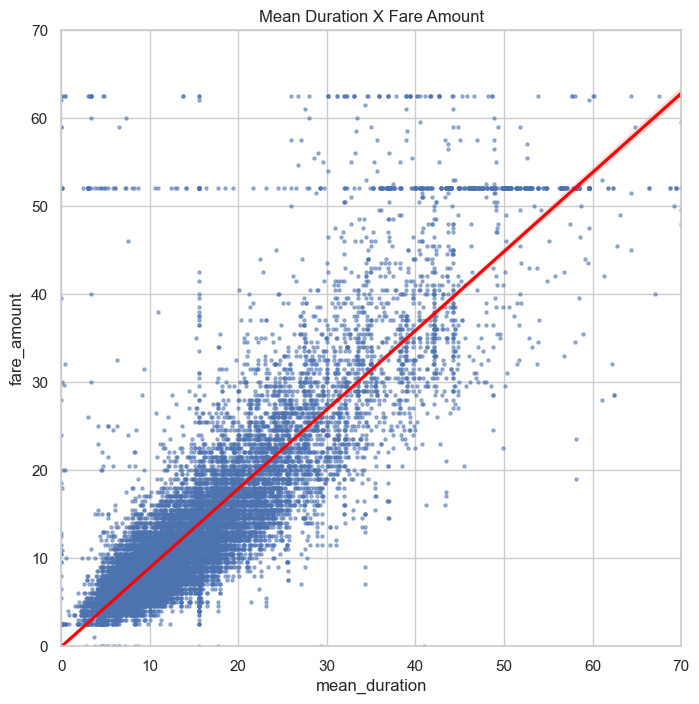

In [234]:

sns.set(style='whitegrid')
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

#Line of best fit also added to the scatter plot
sns.regplot(x=df['mean_duration'], y=df['fare_amount'],
            scatter_kws={'alpha': 0.5, 's': 5},
            line_kws={'color': 'red'})

plt.ylim(0, 70)  # Adjust the y-axis limits as needed
plt.xlim(0, 70)  # Adjust the x-axis limits as needed
plt.title('Mean Duration X Fare Amount')

plt.show()


In [ ]:
'''
The positive correlation between duration and fare amount is evident. The data points forming a line
at the level of around $52, however, will be investigated (The other line-like formation at the $62.50 level is 
due to previous imputation of that specific amount as the upper threshold for fare amount)


In [235]:
df[df['fare_amount'] > 50]['fare_amount'].value_counts().head()

fare_amount
52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: count, dtype: int64

In [236]:
pd.set_option('display.max_columns', None)
df[df['fare_amount']==52].head(20)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month,day,duration,pickup_dropoff,mean_distance,mean_duration,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,mar,sunday,36.800000,236 132,19.211667,40.500000,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,jun,saturday,66.850000,132 163,19.229000,52.941667,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,nov,saturday,0.966667,132 132,2.255862,3.021839,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,dec,wednesday,29.183333,132 79,19.431667,47.275000,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,sep,sunday,29.483333,132 234,17.654000,49.833333,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,feb,tuesday,39.833333,132 48,18.761905,58.246032,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,jun,monday,15.616667,228 88,4.730000,15.616667,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,aug,thursday,45.450000,132 48,18.761905,58.246032,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,sep,tuesday,42.850000,186 132,17.096000,42.920000,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,apr,sunday,71.583333,132 148,17.994286,46.340476,0


In [237]:
# According to data dictionary, RateID 2 is for JFK, which had a flat rate of $52.

In [239]:
'''Isolating the variables that we will need to build the regression model and eliminating those that we will not
use to regress on our target dependent variable (fare_amount)'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

In [240]:
df2 = df.copy()

df2 = df2.drop(['Unnamed: 0', 'tpep_dropoff_datetime', 'tpep_pickup_datetime',
               'trip_distance', 'RatecodeID', 'store_and_fwd_flag', 'PULocationID', 'DOLocationID',
               'payment_type', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
               'total_amount', 'tpep_dropoff_datetime', 'tpep_pickup_datetime', 'duration',
               'pickup_dropoff', 'day', 'month'
               ], axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


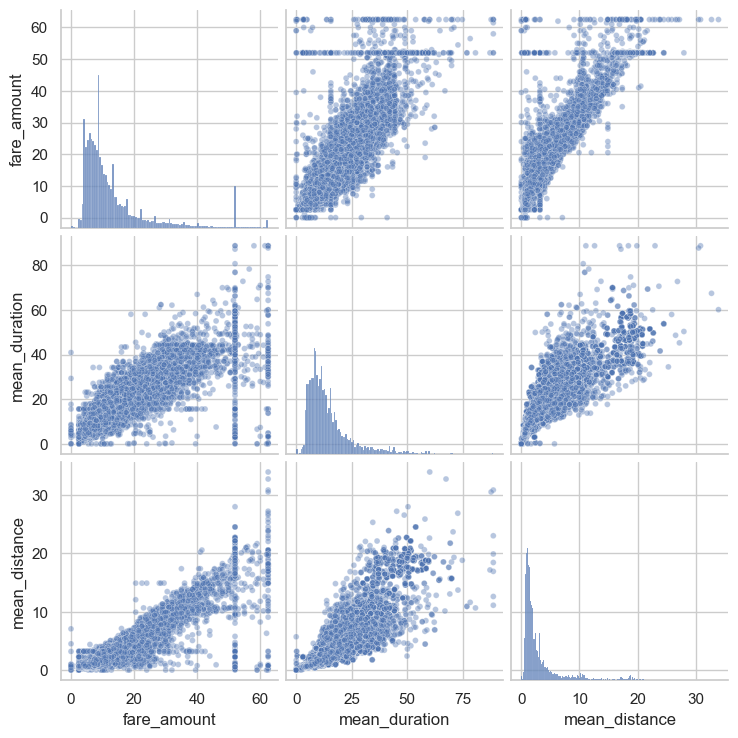

In [241]:
'''Relationship between fare amount and its potential regressors are observed through scatter plots,
which reveal a clear correlation'''
sns.pairplot(df2[['fare_amount', 'mean_duration', 'mean_distance']],
             plot_kws={'alpha':0.4, 'size':5},
             );

In [242]:
df2.corr(method='pearson')

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002874
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.022035
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020075
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039725
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021583
rush_hour,-0.002874,-0.022035,-0.020075,-0.039725,-0.021583,1.000000


In [ ]:
'''Correlation coefficients between 
fare_amount and mean distance = 0.910185
fare_amount and mean_duration = 0.859105 
'''which are fine'''

The estimate of 0.87486 for mean_duration and mean_distance however indicates multicollinearity. 
In terms of making statistical conclusions, it is one thing we look to avoid. However, although correlated,
these explanatory variables can still be used to build a predictive model, as prediction is priority now, not
the usage of the multiple regression model as a data analysis tool. 

In [243]:
#Removing fare amount and setting it as the dependent variable:
X = df2.drop(columns=['fare_amount'])
y = df2[['fare_amount']]
X.head()

,VendorID,passenger_count,mean_distance,mean_duration,rush_hour
0,2,6,3.521667,22.847222,0
1,1,1,3.108889,24.470370,0
2,1,1,0.881429,7.250000,1
3,2,1,3.700000,30.250000,0
4,2,1,4.435000,14.616667,0


In [247]:
# Time to encode categorical variables using dummy encoding:
X['VendorID'] = X['VendorID'].astype(str)
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,True
1,1,3.108889,24.470370,0,False
2,1,0.881429,7.250000,1,False
3,1,3.700000,30.250000,0,True
4,1,4.435000,14.616667,0,True


In [249]:
#20% of total samples reserved for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [250]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.50301524  0.8694684   0.17616665 -0.64893329  0.89286563]
 [-0.50301524 -0.60011281 -0.69829589  1.54099045  0.89286563]
 [ 0.27331093 -0.47829156 -0.57301906 -0.64893329 -1.11998936]
 ...
 [-0.50301524 -0.45121122 -0.6788917  -0.64893329 -1.11998936]
 [-0.50301524 -0.58944763 -0.85743597  1.54099045 -1.11998936]
 [ 1.82596329  0.83673851  1.13212101 -0.64893329  0.89286563]]


In [251]:
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [252]:
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8398434585044773
R^2: 0.8398434585044773
MAE: 2.186666416775414
MSE: 17.88973296349268
RMSE: 4.229625629236313


In [253]:
#As high as 84% of the variance in the target variable (fare_amount) is explained by the model as evident from the R^2 of 0.84.

In [254]:
X_test_scaled = scaler.transform(X_test)

In [255]:
#To evaluate the performance of the model on the test data:
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8682583641795454
R^2: 0.8682583641795454
MAE: 2.1336549840593864
MSE: 14.326454156998942
RMSE: 3.7850302716093225


In [ ]:
#The model performs well on the test data, too. No bias or overfitting. MAE is low in both training and test data
#and they are informative in the context of our model.

In [256]:
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.356503,1.643497
18134,28.0,16.314595,11.685405
4655,5.5,6.726789,-1.226789
7378,15.5,16.227206,-0.727206
13914,9.5,10.536408,-1.036408


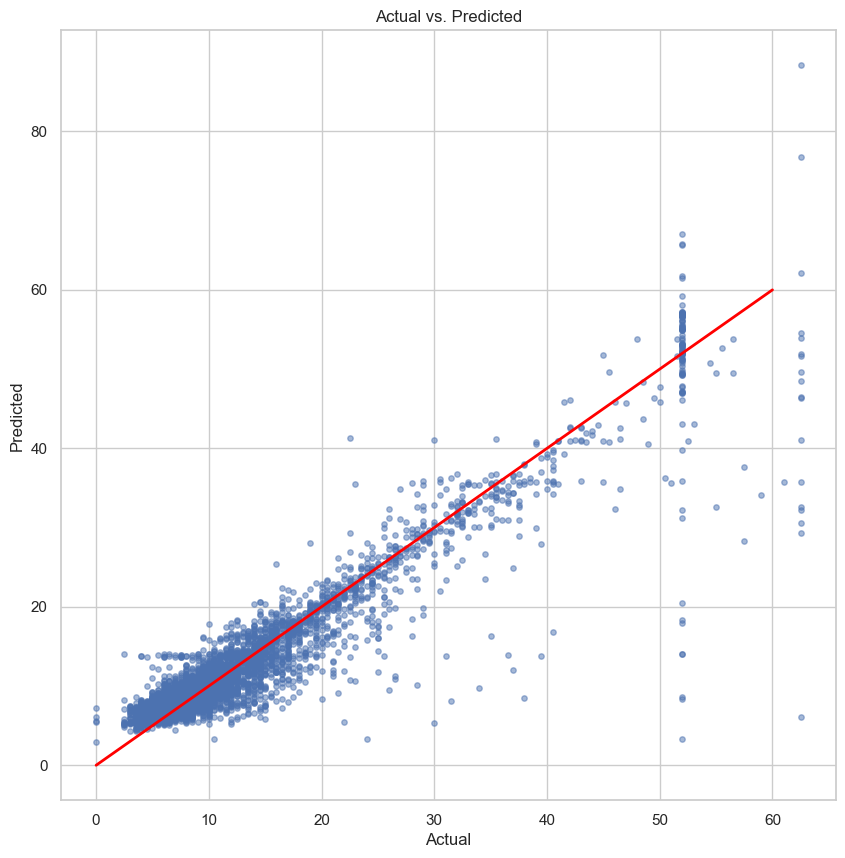

In [264]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(results['actual'], results['predicted'], s=15, alpha=0.5) 
plt.plot([0, 60], [0, 60], c='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.grid(True)
plt.show()


In [ ]:
#Actual and predicted values move in correlation.

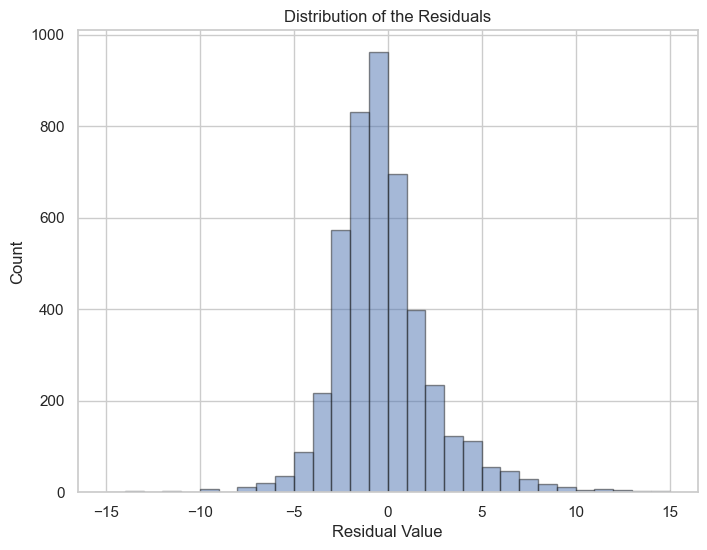

In [265]:
plt.figure(figsize=(8, 6))
plt.hist(results['residual'], bins=range(-15, 16), alpha=0.5, edgecolor='k')
plt.title('Distribution of the Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [266]:
#Model's errors are distributed evenly with normal distribution as seen above and have a very low mean:

results['residual'].mean()

-0.01544262152868054

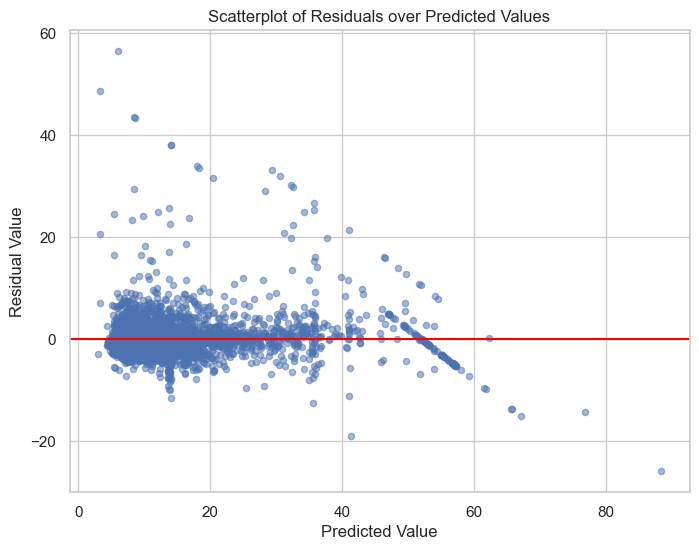

In [267]:
plt.figure(figsize=(8, 6))
plt.scatter(results['predicted'], results['residual'], s=20, alpha=0.5)
plt.axhline(0, c='red')
plt.title('Scatterplot of Residuals over Predicted Values')
plt.xlabel('Predicted Value')
plt.ylabel('Residual Value')
plt.grid(True)
plt.show()

In [268]:
#The spread is narrow, suggesting consistent predictors. I also want to see the distribution between underestimation 
# and overestimation:

underestimated = len(results[results['residual'] < 0])
overestimated = len(results[results['residual'] > 0])

print("Number of Underestimated Data Points:", underestimated)
print("Number of Overestimated Data Points:", overestimated)


Number of Underestimated Data Points: 2756
Number of Overestimated Data Points: 1784


In [269]:
2756 / 1784
# Although underestimated data points are around 1.5 times more than the overestimated data points, their spread
# is much narrower. This finding could still lead to a potential improvement point for the model after further 
# investigation, if required. 

1.5448430493273542

In [270]:
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.030825,7.133867,2.812115,0.110233,-0.054373


In [273]:
#As expected, mean_distance and mean_duration as our regressors explain fare_amount strongly.
'''As I standardised the data before training the model, we can conclude that for every +1 change in standard deviation
in mean_distance, fare amount increases by a mean of $7.13.
To flesh out this relationship, we will convert SD into miles:'''

print(X_train['mean_distance'].std())

print(7.133867 / X_train['mean_distance'].std())

3.574812975256436
1.9955916713344308


In [ ]:
#For every 3.57 miles travelled, fare_amount increased by a mean of $7.13.

In [272]:
7.13 / 3.57

1.9971988795518207

In [ ]:
#Or, for every 1 mile travelled, fare amount increased by a mean of $2.

In [274]:
print(X_train['mean_duration'].std())

print(2.812115 / X_train['mean_duration'].std())

10.100132624321137
0.27842357170918947


In [282]:
X_scaled = scaler.transform(X)
y_preds_full = lr.predict(X_scaled)

In [283]:
'''We now get the predictions on the full dataset. The fares with RatecodeID 2 (JFK airport with flat rate of $52) 
will not need to be predicted, so y predictions where RatecodeID ==2 will be replaced with 52.'''

final_preds = df[['RatecodeID']].copy()
final_preds['y_preds_full'] = y_preds_full
final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52
final_preds[final_preds['RatecodeID']==2].head()

,RatecodeID,y_preds_full
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0


In [284]:
final_preds = final_preds['y_preds_full']
print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(y, final_preds)))

R^2: 0.8910853978683975
MAE: 1.992506252269974
MSE: 12.101575504689935
RMSE: 3.4787318816905013


In [ ]:
#The multiple regression model is now even more robust, as evident from reduced error metrics and a .03 higher 
#R squared value.

In [285]:
# Combine means columns with predictions column
nyc_preds_means = df[['mean_duration', 'mean_distance']].copy()
nyc_preds_means['predicted_fare'] = final_preds

nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642


In [ ]:
'''Now I want to build a model that could predict the most generous customers. This should be possible with 
the tip_amount data we have in the dataset. Other features that can be used as our predictors to explain the 
dependent variable would be pick-up/drop-off locations, fare estimations, payment methods, times and dates. 
 I can create a boolean column based on whether a tip exceeds 20%. After knowing the class balance of the 
 target variable, I will have a better understanding as to which metrics would be best to use. As this is a
 classification task accuracy, precision, recall, F-score and area under the ROC curve could potentially be
 the metrics to consider. 
  '''

In [287]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from xgboost import plot_importance

In [ ]:
pd.set_option('display.max_columns', None) # so that I can see all columns with no redactions. 


In [308]:
df0 = pd.read_csv('Yellow_Taxi_Trip_Data.csv')

In [309]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [310]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [302]:
nyc_preds_means.head()

,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.434245
1,24.470370,3.108889,16.052218
2,7.250000,0.881429,7.053706
3,30.250000,3.700000,18.731650
4,14.616667,4.435000,15.845642


In [311]:
#Merging the two datasets
df0 = df0.merge(nyc_preds_means,
                left_index=True,
                right_index=True)

df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642


In [312]:
# It worked well.
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [313]:
#As the EDA previously revealed, tranasactions paid with cash usually had zero tip amounts. So for the purposes of this
#model, we exclude those and work with those paying with credit card:

df1 = df0[df0['payment_type']==1]

In [314]:
#To serve for the purposes of boolean variable that we are trying to predict with this model, I need to create
#a tip percentage column, so that in the next step those above 20% can be assigned as 1 and those below as 0. 

df1['tip_percent'] = round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']), 3)

/var/folders/hp/5g38_43519bfmfp3l0c4rc9m0000gn/T/ipykernel_54712/468841063.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tip_percent'] = round(df1['tip_amount'] / (df1['total_amount'] - df1['tip_amount']), 3)


In [315]:
df1['generous'] = df1['tip_percent']
df1['generous'] = (df1['generous'] >= 0.2)
df1['generous'] = df1['generous'].astype(int)

/var/folders/hp/5g38_43519bfmfp3l0c4rc9m0000gn/T/ipykernel_54712/545210796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['generous'] = df1['tip_percent']
/var/folders/hp/5g38_43519bfmfp3l0c4rc9m0000gn/T/ipykernel_54712/545210796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['generous'] = (df1['generous'] >= 0.2)
/var/folders/hp/5g38_43519bfmfp3l0c4rc9m0000gn/T/ipykernel_54712/545210796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

In [316]:
#As in previous model, to work with date and time date:

df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')

/var/folders/hp/5g38_43519bfmfp3l0c4rc9m0000gn/T/ipykernel_54712/1062452710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'], format='%m/%d/%Y %I:%M:%S %p')
/var/folders/hp/5g38_43519bfmfp3l0c4rc9m0000gn/T/ipykernel_54712/1062452710.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['tpep_dropoff_datetime'] = pd.to_datetime(df1['tpep_dropoff_datetime'], format='%m/%d/%Y %I:%M:%S %p')


In [317]:
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()

/var/folders/hp/5g38_43519bfmfp3l0c4rc9m0000gn/T/ipykernel_54712/1001904059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['day'] = df1['tpep_pickup_datetime'].dt.day_name().str.lower()


In [318]:

df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour
df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour
df1['pm_rush'] = df1['tpep_pickup_datetime'].dt.hour
df1['nighttime'] = df1['tpep_pickup_datetime'].dt.hour

/var/folders/hp/5g38_43519bfmfp3l0c4rc9m0000gn/T/ipykernel_54712/4215417972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['am_rush'] = df1['tpep_pickup_datetime'].dt.hour
/var/folders/hp/5g38_43519bfmfp3l0c4rc9m0000gn/T/ipykernel_54712/4215417972.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['daytime'] = df1['tpep_pickup_datetime'].dt.hour
/var/folders/hp/5g38_43519bfmfp3l0c4rc9m0000gn/T/ipykernel_54712/4215417972.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

In [319]:
# Rush houriser for 06:00–10:00
def am_rush_houriser(hour):
    if 6 <= hour['am_rush'] < 10:
        val = 1
    else:
        val = 0
    return val

In [320]:
df1['am_rush'] = df1.apply(am_rush_houriser, axis=1)
df1['am_rush'].head()

/var/folders/hp/5g38_43519bfmfp3l0c4rc9m0000gn/T/ipykernel_54712/4226210990.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['am_rush'] = df1.apply(am_rush_houriser, axis=1)


0    1
1    0
2    1
3    0
5    0
Name: am_rush, dtype: int64

In [321]:
#For 10:00-16:00

def daytime(hour):
    if 10 <= hour['daytime'] < 16:
        val = 1
    else:
        val = 0
    return val

In [322]:
df1['daytime'] = df1.apply(daytime, axis=1)

/var/folders/hp/5g38_43519bfmfp3l0c4rc9m0000gn/T/ipykernel_54712/3956739976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['daytime'] = df1.apply(daytime, axis=1)


In [324]:
def pm_rush_houriser(hour):
    if 16 <= hour['pm_rush'] < 20:
        val = 1
    else:
        val = 0
    return val

In [325]:
df1['pm_rush'] = df1.apply(pm_rush_houriser, axis=1)

/var/folders/hp/5g38_43519bfmfp3l0c4rc9m0000gn/T/ipykernel_54712/2938833240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['pm_rush'] = df1.apply(pm_rush_houriser, axis=1)


In [327]:
#Nighttime conversion function:
def nighttime(hour):
    if 20 <= hour['nighttime'] < 24:
        val = 1
    elif 0 <= hour['nighttime'] < 6:
        val = 1
    else:
        val = 0
    return val

In [328]:
df1['nighttime'] = df1.apply(nighttime, axis=1)

/var/folders/hp/5g38_43519bfmfp3l0c4rc9m0000gn/T/ipykernel_54712/3685140887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['nighttime'] = df1.apply(nighttime, axis=1)


In [329]:
df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()

/var/folders/hp/5g38_43519bfmfp3l0c4rc9m0000gn/T/ipykernel_54712/1794553883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['month'] = df1['tpep_pickup_datetime'].dt.strftime('%b').str.lower()


In [330]:
#Fields that are not relevant to our model will need to be dropped. 

df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare,tip_percent,generous,day,am_rush,daytime,pm_rush,nighttime,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245,0.200,1,saturday,1,0,0,0,mar
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218,0.238,1,tuesday,0,1,0,0,apr
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706,0.199,0,friday,1,0,0,0,dec
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650,0.300,1,sunday,0,1,0,0,may
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,11.855376,2.052258,10.441351,0.200,1,saturday,0,0,0,1,mar


In [331]:
drop_cols = ['Unnamed: 0', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'payment_type', 'trip_distance', 'store_and_fwd_flag', 'payment_type',
             'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
             'improvement_surcharge', 'total_amount', 'tip_percent']

df1 = df1.drop(drop_cols, axis=1)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         15265 non-null  int64  
 1   passenger_count  15265 non-null  int64  
 2   RatecodeID       15265 non-null  int64  
 3   PULocationID     15265 non-null  int64  
 4   DOLocationID     15265 non-null  int64  
 5   mean_duration    15265 non-null  float64
 6   mean_distance    15265 non-null  float64
 7   predicted_fare   15265 non-null  float64
 8   generous         15265 non-null  int64  
 9   day              15265 non-null  object 
 10  am_rush          15265 non-null  int64  
 11  daytime          15265 non-null  int64  
 12  pm_rush          15265 non-null  int64  
 13  nighttime        15265 non-null  int64  
 14  month            15265 non-null  object 
dtypes: float64(3), int64(10), object(2)
memory usage: 1.9+ MB


In [332]:
# Some columns need to be converted into strings:
cols_to_str = ['RatecodeID', 'PULocationID', 'DOLocationID', 'VendorID']

for col in cols_to_str:
    df1[col] = df1[col].astype('str')

In [333]:
#Categorical variables need to be converted into binary, for the purposes of our model that involves classification.
df2 = pd.get_dummies(df1, drop_first=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15265 entries, 0 to 22698
Columns: 347 entries, passenger_count to month_sep
dtypes: bool(338), float64(3), int64(6)
memory usage: 6.1 MB


In [334]:
# Class balance, as discussed earlier. 
df2['generous'].value_counts(normalize=True)

generous
1    0.526368
0    0.473632
Name: proportion, dtype: float64

In [ ]:
#The two binary classes look very close, with those tipping over 20% representing slightly more than half of all 
#customers in this dataset. 
'''Naturally we expect our predictors in this model explain the dependent/target variable. So we need to look for
a statistically significant relationship between our explanatory variables and the fare amount. However, I also need
to weigh the potential errors of the model, as in Type I or II, as this could result in dissatisfied drivers or customers:

So, false positives are particularly disadvantageous for taxi drivers since they might end up picking up passengers 
anticipating a generous tip, only to be disappointed when it doesn't materialise, leading to driver frustration.

Conversely, false negatives are more problematic for customers, as a taxi driver might opt to serve a different
passenger predicted to be a more substantial tipper, even if the original customer would have tipped generously.

Balancing the interests of both drivers and passengers is essential as what we aim for is to help taxi drivers increase 
their earnings without alienating passengers. The ideal metric in this scenario should assign equal importance to precision 
and recall. Then what I need to find out is which metric fits this reasoning.

The F1 score is a metric that combines both precision and recall, and it places equal importance on minimising false 
positives and false negatives.

It is calculated as:
F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

The F1 score helps strike a balance between these two concerns explained above by considering both precision 
(minimising false positives) and recall (minimizing false negatives) with equal weight.


In [335]:
# To isolate the target variable as y and features as X:
y = df2['generous']

X = df2.drop('generous', axis=1)

#20% test data, the rest being training data:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=45)

In [337]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# To instantiate the random forest classifier:
rf = RandomForestClassifier(random_state=45)

# To create a dictionary of hyperparameters to tune
cv_params = {
    'max_depth': [None],
    'max_features': [1.0],
    'max_samples': [0.7],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [300]
}

# To define a dictionary of scoring metrics to capture
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}

# To instantiate the GridSearchCV object with 3-fold cross-validation: (this could be increased later)
rf1 = GridSearchCV(estimator=rf, param_grid=cv_params, scoring=scoring, cv=3, refit='f1')

# To fit the model to the training data:
rf1.fit(X_train, y_train)

# To define the make_results function:
def make_results(model_name, model_object, metric):
    metric_dict = {
        'precision': 'mean_test_precision',
        'recall': 'mean_test_recall',
        'f1': 'mean_test_f1',
        'accuracy': 'mean_test_accuracy'
    }

    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    table = pd.DataFrame({
        'model': [model_name],
        'precision': [precision],
        'recall': [recall],
        'F1': [f1],
        'accuracy': [accuracy]
    })

    return table

# Finally, calling 'make_results()' on the GridSearch object:
results = make_results('RF CV', rf1, 'f1')
print(results)


   model  precision    recall        F1  accuracy
0  RF CV   0.678099  0.759957  0.716697  0.683754


In [ ]:
#To see if an improvement is possible for the model, I make some changes to the hyperparameters.

In [339]:

# To instantiate the random forest classifier:
rf = RandomForestClassifier(random_state=46)

# To create a dictionary of hyperparameters to tune

cv_params = {
    'max_depth': [10, 20, 30],  # Experiment with different tree depths
    'max_features': ['sqrt'],  # Use square root of features
    'max_samples': [0.7],  # Keep the original value
    'min_samples_leaf': [1, 2, 3],  # Experiment with different min_samples_leaf values
    'min_samples_split': [2, 3, 4],  # Experiment with different min_samples_split values
    'n_estimators': [500, 1000]  # Experiment with a higher number of trees
}

# To define a dictionary of scoring metrics to capture
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}

# To instantiate the GridSearchCV object with 3-fold cross-validation: (this could be increased later)
rf1 = GridSearchCV(estimator=rf, param_grid=cv_params, scoring=scoring, cv=3, refit='f1')

# To fit the model to the training data:
rf1.fit(X_train, y_train)

# To define the make_results function:
def make_results(model_name, model_object, metric):
    metric_dict = {
        'precision': 'mean_test_precision',
        'recall': 'mean_test_recall',
        'f1': 'mean_test_f1',
        'accuracy': 'mean_test_accuracy'
    }

    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    table = pd.DataFrame({
        'model': [model_name],
        'precision': [precision],
        'recall': [recall],
        'F1': [f1],
        'accuracy': [accuracy]
    })

    return table

# Finally, calling 'make_results()' on the GridSearch object:
results = make_results('RF CV', rf1, 'f1')
print(results)


   model  precision    recall        F1  accuracy
0  RF CV   0.692214  0.813474  0.747954  0.711432


In [ ]:
'''Rerunning the rf classifier model is actually worth it as the updated hyperparameters provides better tuning as 
seen from the improved scores. My reasoning behind using new parameters is explained below.

The second block of hyperparameters is more comprehensive and tuned, which makes it more likely to yield better results. 
Here's how some of the differences can impact the model's performance:

max_depth: By limiting tree depths, it helps reduce overfitting and ensures more interpretable models.
max_features: Using 'sqrt' reduces the risk of overfitting by considering fewer features for each split, which can make 
the model more robust.
min_samples_leaf and min_samples_split: These parameters control the complexity of the trees and affect the trade-off 
between bias and variance.
n_estimators: Increasing the number of trees in the ensemble generally improves model performance.

In short, the second block of hyperparameters is designed to provide a better trade-off between overfitting and underfitting 
and allows for a more comprehensive search for optimal hyperparameters. 

In [340]:
# Get scores on test data
rf_preds = rf1.best_estimator_.predict(X_test)

# Define the get_test_scores function
def get_test_scores(model_name, preds, y_test_data):
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({
        'model': [model_name],
        'precision': [precision],
        'recall': [recall],
        'F1': [f1],
        'accuracy': [accuracy]
    })

    return table

# Get scores on test data, add them to the results DF and display updated reulsts
rf_test_scores = get_test_scores('RF test', rf_preds, y_test)
results = pd.concat([results, rf_test_scores], axis=0)
print(results)


     model  precision    recall        F1  accuracy
0    RF CV   0.692214  0.813474  0.747954  0.711432
0  RF test   0.690021  0.808961  0.744772  0.708156


In [ ]:
#I will also try and see the results from an XGB model.

In [342]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

#  Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=47)

# Create a dictionary of hyperparameters to tune
cv_params = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 8, 10],
    'min_child_weight': [1, 2, 3],
    'n_estimators': [100, 300, 500]
}

# 3. Define a dictionary of scoring metrics to capture
scoring = {'accuracy': 'accuracy', 'precision': 'precision', 'recall': 'recall', 'f1': 'f1'}

# 4. Instantiate the GridSearchCV object
xgb1 = GridSearchCV(estimator=xgb, param_grid=cv_params, scoring=scoring, cv=4, refit='f1')

# Fit the model to the training data
xgb1.fit(X_train, y_train)


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=47, ...),
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [5, 8, 10], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [100, 300, 500]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

In [343]:
xgb1_cv_results = make_results('XGB CV', xgb1, 'f1')
results = pd.concat([results, xgb1_cv_results], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.692214,0.813474,0.747954,0.711432
0,RF test,0.690021,0.808961,0.744772,0.708156
0,XGB CV,0.691387,0.812694,0.747141,0.710449


In [344]:
# To get scores on test data:
xgb_preds = xgb1.best_estimator_.predict(X_test)

In [345]:
xgb_test_scores = get_test_scores('XGB test', xgb_preds, y_test)
results = pd.concat([results, xgb_test_scores], axis=0)
results

,model,precision,recall,F1,accuracy
0,RF CV,0.692214,0.813474,0.747954,0.711432
0,RF test,0.690021,0.808961,0.744772,0.708156
0,XGB CV,0.691387,0.812694,0.747141,0.710449
0,XGB test,0.689254,0.810205,0.744851,0.707828


In [ ]:
'''The RF model tuned finer (seed 46) outperformed the first RF model I run (seed 45) in all scores. It also showed a 
very similar performance with that of the XGBoost model, which would not be possible without finer tuning.
Read further for detailed explanation and comparison of the above scores returned for the improved RF and XGBoost model.

We have evaluated their performance using cross-validation (CV) and on a test set. Now it is time to interpret and
compare results.

Random Forest (RF):
- In cross-validation (RF CV), the model achieved a precision of approximately 0.692, which means that of all the positive
predictions it made, around 69.2% were correct.
- The recall in cross-validation (RF CV) is about 0.813, indicating that the model correctly identified approximately 
81.3% of all actual positive cases.
- The F1 score in cross-validation (RF CV) is approximately 0.748, which is a good balance between precision and recall.
- The accuracy in cross-validation (RF CV) is around 0.711, showing that the model correctly classified approximately 
71.1% of all instances.

Random Forest (RF) on the Test Set:
- When evaluated on the test set (RF test), the model's performance is similar to cross-validation, with slightly lower 
precision (around 0.690) and recall (around 0.809). The F1 score (around 0.745) and accuracy (around 0.708) remain at 
similar levels.

XGBoost (XGB):
- In cross-validation (XGB CV), the XGBoost model achieved a precision of approximately 0.691 and a recall of about 0.813. The F1 score is approximately 0.747, and the accuracy is around 0.710.

XGBoost (XGB) on the Test Set:
- When evaluated on the test set (XGB test), the XGBoost model's performance is similar to cross-validation, with 
precision (around 0.689) and recall (around 0.810). The F1 score (around 0.745) and accuracy (around 0.708) are consistent
with the cross-validation results.

Comparison:
- Both Random Forest and XGBoost show similar performance across the different metrics (precision, recall, F1 score, 
accuracy) in both cross-validation and on the test set.
- Both models achieve high recall, indicating their ability to correctly identify positive cases, but this comes at a 
slight cost in terms of precision.
- The F1 scores for both models are also similar, indicating a good balance between precision and recall.
- The accuracy is consistent for both models as well.

In short, random Forest and XGBoost perform similarly on the given task, making both models acceptable.

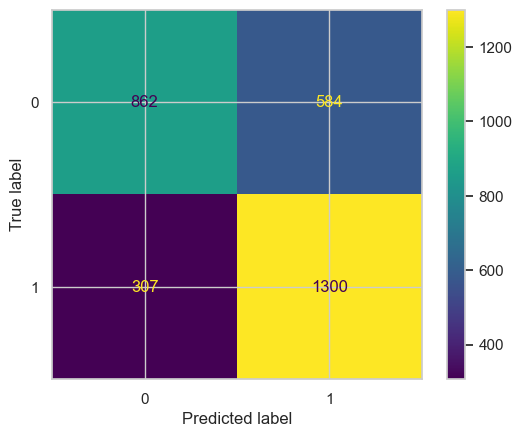

In [346]:
cm = confusion_matrix(y_test, rf_preds, labels=rf1.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf1.classes_, 
                             )
disp.plot(values_format='');




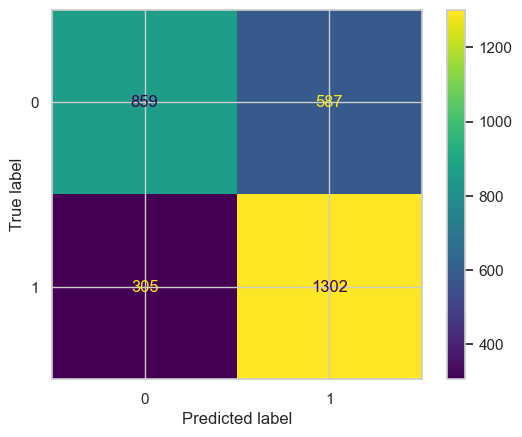

In [349]:
cm = confusion_matrix(y_test, xgb_preds, labels=xgb1.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=xgb1.classes_,
                              )
disp.plot(values_format='');

In [ ]:
''' The confusion matrices of models above reveal that both models exhibit a higher probability of making false 
positive predictions compared to false negatives, making Type I errors more prevalent. This situation is suboptimal, 
as it's more favorable for a driver to experience a positive surprise, receiving a generous tip unexpectedly, rather than 
encountering disappointment when they had anticipated a generous tip. Nevertheless, the models' overall performance remain 
acceptable.